# 1. IFF is in the middle of fundraising season and is looking for potential donors.

Please write a script in Python/R that extracts the data of the wealthiest charitable
foundations from this Wikipedia page:
https://en.wikipedia.org/wiki/List_of_wealthiest_charitable_foundations and exports
the output of the dataframe into a csv (please make sure to include all of the columns
except Endowment in Home Currency and References). Paste the script below.

In [60]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

url = "https://en.wikipedia.org/wiki/List_of_wealthiest_charitable_foundations"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find_all('table')[0]
table_html = StringIO(str(table))

df = pd.read_html(table_html)[0]
print(df.columns)

Index(['Rank', 'Organisation', 'Country', 'Headquarters', 'Endowment in USD',
       'Endowment in home currency', 'Founded', 'References'],
      dtype='object')


In [61]:
df.drop(['Endowment in home currency', 'References'], axis=1, inplace=True)
print(df.columns)

Index(['Rank', 'Organisation', 'Country', 'Headquarters', 'Endowment in USD',
       'Founded'],
      dtype='object')


In [62]:
df.to_csv('wealthiest_charitable_foundations.csv', index=False)

print("Data has been successfully exported to 'wealthiest_charitable_foundations.csv'.")

Data has been successfully exported to 'wealthiest_charitable_foundations.csv'.


In [63]:
print(df.head())

   Rank                     Organisation         Country Headquarters  \
0     1          Novo Nordisk Foundation         Denmark   Copenhagen   
1     2  Bill & Melinda Gates Foundation   United States      Seattle   
2     3                   Wellcome Trust  United Kingdom       London   
3     4       Stichting INGKA Foundation     Netherlands       Leiden   
4     5            Mastercard Foundation          Canada      Toronto   

  Endowment in USD  Founded  
0   $120.2 billion     1989  
1    $50.2 billion     2000  
2    $42.8 billion     1936  
3    $37.3 billion     1982  
4    $31.5 billion     2006  


# 2. Our CEO is excited about the list of potential donors located in the US and wants to see where they are located. 

Create a script in Python/R that takes the
previous table and joins it to the attached uscities_csv file, and create a map with
the following:

a. Each organization in the US placed on the map according using the
latitude and longitude in the data (there should be 30 in total)

b. The size of the points of the map should be set according to the size
of the endowment (i.e. bigger endowments should be bigger and
smaller endowments should be smaller)

c. Each point should be a different color (at least 5 different colors in
total)

In [64]:
import plotly.express as px

foundations_df = pd.read_csv('wealthiest_charitable_foundations.csv')

uscities_df = pd.read_csv('uscities.csv')

print(uscities_df.columns)

Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')


In [65]:
print("Unique Cities in Foundations DataFrame:\n", us_foundations_df['City'].unique())
print("Unique Cities in US Cities DataFrame:\n", uscities_df['city'].unique())
print("Unique States in Foundations DataFrame:\n", us_foundations_df['State'].unique())
print("Unique States in US Cities DataFrame:\n", uscities_df['state_id'].unique())


Unique Cities in Foundations DataFrame:
 ['Seattle' 'Chevy Chase' 'New York' 'Indianapolis' 'San Jose' 'Honolulu'
 'Princeton' 'Los Angeles' 'Palo Alto' 'Minneapolis' 'Menlo Park'
 'Battle Creek' 'Los Altos' 'Chicago' 'Westlake Village' 'Jacksonville'
 'Tulsa' 'Troy' 'Oakland' 'Charlotte' 'Cleveland' 'Kansas City']
Unique Cities in US Cities DataFrame:
 ['New York' 'Los Angeles' 'Chicago' ... 'Mount Wilson' 'Kohatk'
 'Falcon Village']
Unique States in Foundations DataFrame:
 [None 'MD' 'CA' 'NJ' 'MI']
Unique States in US Cities DataFrame:
 ['NY' 'CA' 'IL' 'FL' 'TX' 'PA' 'GA' 'DC' 'MA' 'AZ' 'MI' 'WA' 'MN' 'CO'
 'NV' 'MD' 'MO' 'OR' 'PR' 'IN' 'OH' 'VA' 'NC' 'WI' 'RI' 'TN' 'UT' 'OK'
 'CT' 'KY' 'LA' 'NE' 'AL' 'NM' 'SC' 'IA' 'KS' 'AR' 'ID' 'NJ' 'HI' 'MS'
 'AK' 'NH' 'ND' 'ME' 'SD' 'WV' 'MT' 'DE' 'VT' 'WY']


In [66]:
# Filter out only the US-based foundations
us_foundations_df = foundations_df[foundations_df['Country'] == 'United States'].copy()

# Normalize city and state names
us_foundations_df[['City', 'State']] = us_foundations_df['Headquarters'].str.split(', ', expand=True)

# Define state abbreviation mapping
state_abbreviation = {
    'California': 'CA',
    'New Jersey': 'NJ',
    'Maryland': 'MD',
    'Michigan': 'MI',
    'New York': 'NY',
    'Florida': 'FL',
    'Texas': 'TX',
    'Pennsylvania': 'PA',
    'Georgia': 'GA',
    'District of Columbia': 'DC',
    'Massachusetts': 'MA',
    'Arizona': 'AZ',
    'Ohio': 'OH',
    'Washington': 'WA',
    'Minnesota': 'MN',
    'Colorado': 'CO',
    'Nevada': 'NV',
    'Missouri': 'MO',
    'Oregon': 'OR',
    'Puerto Rico': 'PR',
    'Indiana': 'IN',
    'North Carolina': 'NC',
    'Wisconsin': 'WI',
    'Rhode Island': 'RI',
    'Tennessee': 'TN',
    'Utah': 'UT',
    'Oklahoma': 'OK',
    'Connecticut': 'CT',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Nebraska': 'NE',
    'Alabama': 'AL',
    'New Mexico': 'NM',
    'South Carolina': 'SC',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Arkansas': 'AR',
    'Idaho': 'ID',
    'New Jersey': 'NJ',
    'Hawaii': 'HI',
    'Mississippi': 'MS',
    'Alaska': 'AK',
    'New Hampshire': 'NH',
    'North Dakota': 'ND',
    'Maine': 'ME',
    'South Dakota': 'SD',
    'West Virginia': 'WV',
    'Montana': 'MT',
    'Delaware': 'DE',
    'Vermont': 'VT',
    'Wyoming': 'WY'
}

# Map state names to abbreviations
us_foundations_df['State'] = us_foundations_df['State'].map(state_abbreviation).fillna(us_foundations_df['State'])

# Standardize city names (e.g., mapping full city names to standard names)
city_mapping = {
    'New York City': 'New York',
    'San Jose': 'San Jose',
    'Los Angeles': 'Los Angeles',
    'Honolulu': 'Honolulu',
    'Indianapolis': 'Indianapolis',
    'Chicago': 'Chicago',
    'Westlake Village': 'Westlake Village',
    'Jacksonville': 'Jacksonville',
    'Tulsa': 'Tulsa',
    'Troy': 'Troy',
    'Oakland': 'Oakland',
    'Charlotte': 'Charlotte',
    'Cleveland': 'Cleveland',
    'Kansas City': 'Kansas City',
    'Chevy Chase': 'Chevy Chase',
    'Princeton': 'Princeton',
    'Menlo Park': 'Menlo Park',
    'Battle Creek': 'Battle Creek',
    'Los Altos': 'Los Altos',
    'Palo Alto': 'Palo Alto',
    'Minneapolis': 'Minneapolis'
}

# Map city names
us_foundations_df['City'] = us_foundations_df['City'].map(city_mapping).fillna(us_foundations_df['City'])

# Print unique values to verify
print("Unique Cities in Foundations DataFrame:\n", us_foundations_df['City'].unique())
print("Unique Cities in US Cities DataFrame:\n", uscities_df['city'].unique())
print("Unique States in Foundations DataFrame:\n", us_foundations_df['State'].unique())
print("Unique States in US Cities DataFrame:\n", uscities_df['state_id'].unique())


Unique Cities in Foundations DataFrame:
 ['Seattle' 'Chevy Chase' 'New York' 'Indianapolis' 'San Jose' 'Honolulu'
 'Princeton' 'Los Angeles' 'Palo Alto' 'Minneapolis' 'Menlo Park'
 'Battle Creek' 'Los Altos' 'Chicago' 'Westlake Village' 'Jacksonville'
 'Tulsa' 'Troy' 'Oakland' 'Charlotte' 'Cleveland' 'Kansas City']
Unique Cities in US Cities DataFrame:
 ['New York' 'Los Angeles' 'Chicago' ... 'Mount Wilson' 'Kohatk'
 'Falcon Village']
Unique States in Foundations DataFrame:
 [None 'MD' 'CA' 'NJ' 'MI']
Unique States in US Cities DataFrame:
 ['NY' 'CA' 'IL' 'FL' 'TX' 'PA' 'GA' 'DC' 'MA' 'AZ' 'MI' 'WA' 'MN' 'CO'
 'NV' 'MD' 'MO' 'OR' 'PR' 'IN' 'OH' 'VA' 'NC' 'WI' 'RI' 'TN' 'UT' 'OK'
 'CT' 'KY' 'LA' 'NE' 'AL' 'NM' 'SC' 'IA' 'KS' 'AR' 'ID' 'NJ' 'HI' 'MS'
 'AK' 'NH' 'ND' 'ME' 'SD' 'WV' 'MT' 'DE' 'VT' 'WY']


In [67]:
# Merge the foundations data with the city data using normalized city and state
merged_df = pd.merge(us_foundations_df, uscities_df, left_on=['City', 'State'], right_on=['city', 'state_id'], how='inner')

# Print the shape and a few rows of the merged DataFrame to check the result
print("Merged DataFrame Shape:", merged_df.shape)
print("Merged DataFrame Sample:\n", merged_df.head())

# Check if lat and lng columns have valid data
print("Latitude and Longitude Check:\n", merged_df[['lat', 'lng']].head())

Merged DataFrame Shape: (10, 25)
Merged DataFrame Sample:
    Rank                          Organisation        Country  \
0     6       Howard Hughes Medical Institute  United States   
1    12   Silicon Valley Community Foundation  United States   
2    17        Robert Wood Johnson Foundation  United States   
3    21     Gordon and Betty Moore Foundation  United States   
4    23  William and Flora Hewlett Foundation  United States   

             Headquarters Endowment in USD  Founded         City State  \
0   Chevy Chase, Maryland    $27.1 billion     1953  Chevy Chase    MD   
1    San Jose, California    $13.6 billion     2007     San Jose    CA   
2   Princeton, New Jersey    $11.4 billion     1972    Princeton    NJ   
3   Palo Alto, California     $9.5 billion     2000    Palo Alto    CA   
4  Menlo Park, California     $8.7 billion     1967   Menlo Park    CA   

          city   city_ascii  ...       lng population  density source  \
0  Chevy Chase  Chevy Chase  ...  -77.

In [68]:
print(merged_df['Endowment in USD'].head())

0    $27.1 billion
1    $13.6 billion
2    $11.4 billion
3     $9.5 billion
4     $8.7 billion
Name: Endowment in USD, dtype: object


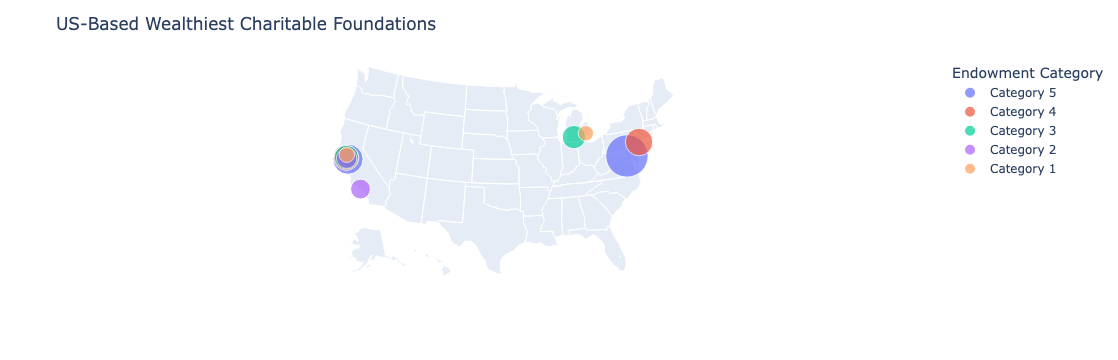

In [70]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import plotly.express as px

merged_df['Endowment in USD'] = merged_df['Endowment in USD'].str.replace('\xa0', ' ').str.replace('$', '').str.replace(',', '')

# Function to convert endowment values to numeric format
def approximate_value(value):
    if 'billion' in value:
        return float(value.replace('$', '').replace(' billion', '').replace(',', '')) * 1e9
    return float(value.replace('$', '').replace(',', ''))

# Apply the conversion function to the 'Endowment in USD' column
merged_df['Endowment Numeric'] = merged_df['Endowment in USD'].apply(approximate_value)

# Create a categorical column for colors
merged_df['Endowment Category'] = pd.qcut(
    merged_df['Endowment Numeric'], 
    q=5, 
    labels=[f'Category {i+1}' for i in range(5)], 
    duplicates='drop'
)


fig = px.scatter_geo(
    merged_df,
    lat='lat',
    lon='lng',
    size='Endowment Numeric',
    color='Endowment Category',  
    hover_name='Organisation',
    hover_data=['Endowment in USD'],
    color_discrete_sequence=px.colors.qualitative.Plotly,  
    size_max=30
)

fig.update_layout(
    title='US-Based Wealthiest Charitable Foundations',
    geo_scope='usa',
    geo=dict(showland=True)
)

fig.show()


# 3. The CEO has requested the donor list again, but this time limited only to states that IFF is currently located in. 

Please provide an updated script in Python/R that filters the data in question 1 to only include rows that are located in current IFF
markets and export the output of a dataframe into a csv.

#### Based on the IFF website, I've identified the states for IFF locations as:
KS (Kansas)
LA (Louisiana)
WV (West Virginia)
GA (Georgia)
ME (Maine)
OH (Ohio)
WI (Wisconsin)
TX (Texas)
IL (Illinois)
NJ (New Jersey)
PA (Pennsylvania)
FL (Florida)
IA (Iowa)
CT (Connecticut)
AL (Alabama)
MI (Michigan)
MO (Missouri)
AR (Arkansas)
MN (Minnesota)
IN (Indiana)
MA (Massachusetts)
NV (Nevada)
MD (Maryland)

In [71]:
print(merged_df.columns)

Index(['Rank', 'Organisation', 'Country', 'Headquarters', 'Endowment in USD',
       'Founded', 'City', 'State', 'city', 'city_ascii', 'state_id',
       'state_name', 'county_fips', 'county_name', 'lat', 'lng', 'population',
       'density', 'source', 'military', 'incorporated', 'timezone', 'ranking',
       'zips', 'id', 'Endowment Numeric', 'Endowment Category'],
      dtype='object')


In [78]:
print(merged_df['State'].unique())

['MD' 'CA' 'NJ' 'MI']


In [79]:
# Define the states where IFF is currently located
iff_states = {
    'KS', 'LA', 'WV', 'GA', 'ME', 'OH', 'WI', 'TX', 'IL', 'NJ',
    'PA', 'FL', 'IA', 'CT', 'AL', 'MI', 'MO', 'AR', 'MN', 'IN',
    'MA', 'NV', 'MD'
}

# Filter the wealth_df to include only rows from the states where IFF is located
filtered_merged_df = merged_df[merged_df['State'].isin(iff_states)]
print(filtered_merged_df['State'].unique())

['MD' 'NJ' 'MI']


In [80]:
# Export the filtered DataFrame to a new CSV file
filtered_wealth_df.to_csv('filtered_donor_list_if_location.csv', index=False)

print("Filtered donor list based on IFF locations exported successfully.")

Filtered donor list based on IFF locations exported successfully.
